In [314]:
# Importing Dependencies
import pandas as pd
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [315]:
# Reading CSV file into pandas.
df_fifa_players_original = pd.read_csv('Resources/fifa_players.csv')

In [316]:
#Creating Copy of original to avoid altering it. 
df_fifa_players = df_fifa_players_original.copy()

#Creating Unique Identifier for each player for join/merge purposes.
df_fifa_players['id'] = range(1, len(df_fifa_players) + 1)

In [317]:
 # Reordering Id coloumn to be the first. 
df_fifa_players = df_fifa_players[['id'] + [col for col in df_fifa_players.columns if col != 'id']]
df_fifa_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In [318]:
#Dropping irrelevant columns
df_fifa_players.drop(columns=['release_clause_euro','age','national_team','national_rating',
                              'national_team_position','national_jersey_number',
                              'international_reputation(1-5)', 'weak_foot(1-5)', 
                              'skill_moves(1-5)','body_type'
                              ], inplace=True)

In [319]:
# Dropping rows with missing values
df_fifa_players = df_fifa_players.dropna(subset=['value_euro','wage_euro'])

In [320]:
# Taking information from players with wages over 5000 Euros . 
df_fifa_players['wage_euro'] = df_fifa_players['wage_euro'].where(df_fifa_players['wage_euro'] > 5000)

# Drop rows where 'wage_euro' is less than 5000
df_fifa_players = df_fifa_players[df_fifa_players['wage_euro'] >= 5000]

# Creating age column as per birthday. 
current_date = pd.Timestamp(datetime.now())
df_fifa_players['birth_date'] = pd.to_datetime(df_fifa_players['birth_date'])
df_fifa_players['age'] = current_date.year - df_fifa_players['birth_date'].dt.year

# Taking information from player ages between 22 and 41 
df_fifa_players['age'] = df_fifa_players['age'].where(df_fifa_players['age'] <= 41)
df_fifa_players = df_fifa_players[df_fifa_players['age'] <= 41]


In [322]:
# Checking for null values
df_fifa_players.isnull().sum()

id                   0
name                 0
full_name            0
birth_date           0
height_cm            0
weight_kgs           0
positions            0
nationality          0
overall_rating       0
potential            0
value_euro           0
wage_euro            0
preferred_foot       0
crossing             0
finishing            0
heading_accuracy     0
short_passing        0
volleys              0
dribbling            0
curve                0
freekick_accuracy    0
long_passing         0
ball_control         0
acceleration         0
sprint_speed         0
agility              0
reactions            0
balance              0
shot_power           0
jumping              0
stamina              0
strength             0
long_shots           0
aggression           0
interceptions        0
positioning          0
vision               0
penalties            0
composure            0
marking              0
standing_tackle      0
sliding_tackle       0
age                  0
dtype: int6

In [323]:
# Creating Dataframe with player info.
df_player_info = df_fifa_players[['id','name','age','birth_date','height_cm','weight_kgs',
       'overall_rating','potential','nationality','value_euro','wage_euro']]

# Converting Age Column to int. 
df_player_info['age'] = df_player_info['age'].astype('Int64')

# Filtering column to have players most preferred position. 
df_player_info['position'] = df_fifa_players['positions'].str.extract(r'^([^,]+)')
df_player_info.head()

C:\Users\rdesh\AppData\Local\Temp\ipykernel_41348\1099704436.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_info['age'] = df_player_info['age'].astype('Int64')
C:\Users\rdesh\AppData\Local\Temp\ipykernel_41348\1099704436.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_info['position'] = df_fifa_players['positions'].str.extract(r'^([^,]+)')


,id,name,age,birth_date,height_cm,weight_kgs,overall_rating,potential,nationality,value_euro,wage_euro,position
0,1,L. Messi,37,1987-06-24,170.18,72.1,94,94,Argentina,110500000.0,565000.0,CF
1,2,C. Eriksen,32,1992-02-14,154.94,76.2,88,89,Denmark,69500000.0,205000.0,CAM
2,3,P. Pogba,31,1993-03-15,190.50,83.9,88,91,France,73000000.0,255000.0,CM
3,4,L. Insigne,33,1991-06-04,162.56,59.0,88,88,Italy,62000000.0,165000.0,LW
4,5,K. Koulibaly,33,1991-06-20,187.96,88.9,88,91,Senegal,60000000.0,135000.0,CB


In [325]:
#Filtering Data to contain information of defensive players
df_defense = df_fifa_players[df_fifa_players['positions'].str.contains('LB|RB|CB|LWB|RWB')]

# Filtering Dataframe to keep columns relevant to defensive players
df_defense = df_defense[['id','aggression', 'interceptions', 
                            'positioning','marking','long_shots',
                            'standing_tackle','short_passing','long_passing',
                            'sliding_tackle']]

df_defense.head()

,id,aggression,interceptions,positioning,marking,long_shots,standing_tackle,short_passing,long_passing,sliding_tackle
4,5,87,88,24,91,15,88,68,60,87
5,6,82,88,41,90,64,89,79,81,84
16,17,86,86,30,92,30,89,73,69,84
20,21,84,89,60,89,66,87,79,74,88
22,23,84,83,85,71,70,82,84,78,83


In [326]:
#Filtering Data to contain information of attacking players
df_attackers = df_fifa_players[df_fifa_players['positions'].str.contains('CM|CAM|RM|LM|ST|CF|\bLW\b|\bRW\b')]

# Filtering Dataframe to keep columns relevant to attacking players
df_attackers = df_attackers[['id','crossing','finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control','shot_power', 'long_shots']]

df_attackers.head()

,id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,shot_power,long_shots
0,1,86,95,70,92,86,97,93,94,89,96,85,94
1,2,88,81,52,91,80,84,86,87,89,91,84,89
2,3,80,75,75,86,85,87,85,82,90,90,90,82
3,4,86,77,56,85,74,90,87,77,78,93,75,84
6,7,77,88,77,82,78,90,77,63,73,91,79,78


In [327]:
#Filtering Data to contain information of physical attributes
df_physical = df_fifa_players[['id','reactions','balance','jumping', 'stamina', 'strength','aggression']]

df_physical.head()

,id,reactions,balance,jumping,stamina,strength,aggression
0,1,95,95,68,72,66,48
1,2,88,81,50,92,58,46
2,3,82,66,83,88,87,78
3,4,83,93,53,75,44,34
4,5,82,40,81,75,94,87


In [328]:
#filtering data to contain information for goalkeepers
df_gk = df_fifa_players[df_fifa_players['positions'].str.contains('GK')]

# Filtering Dataframe to keep columns relevant to Goalkeepers
df_gk = df_gk[['id', 'agility','positioning', 'reactions', 'jumping', 'strength',
       'balance','stamina']]
df_gk.head()

,id,agility,positioning,reactions,jumping,strength,balance,stamina
8,9,51,12,84,77,80,35,43
11,12,61,13,84,68,70,45,38
12,13,37,11,86,79,78,43,35
27,28,60,16,84,74,75,61,39
32,33,41,15,79,71,51,39,37


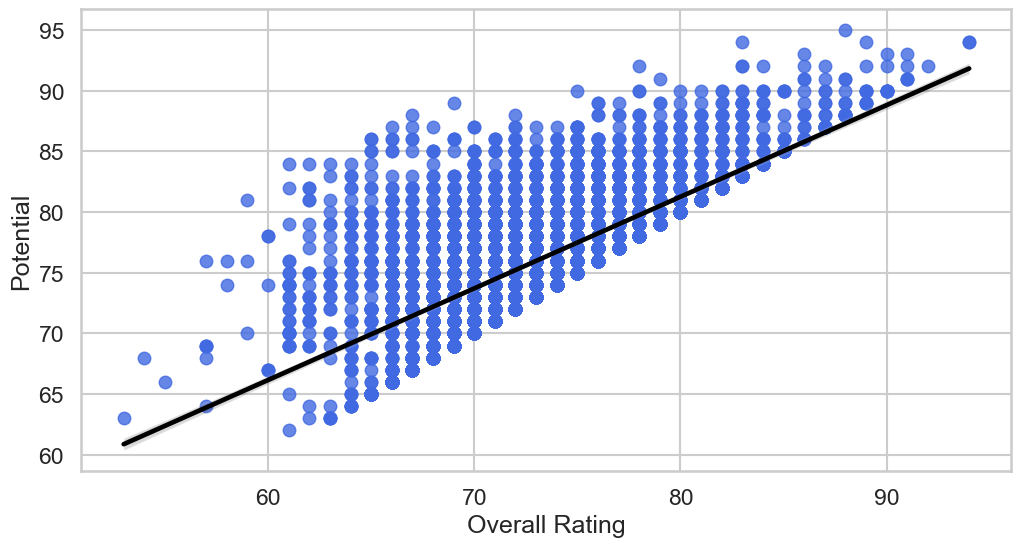

In [329]:
# Linear regression line plot for overall_rate vs potential of the player 
# Create a scatter plot with linear regression line 
plt.figure(figsize=(12, 6))
sns.regplot(x="overall_rating", y="potential", data=df_player_info, scatter_kws={"color":"royalblue"}, line_kws={"color":"black"})

# Set the custom axis labels
plt.xlabel("Overall Rating")
plt.ylabel("Potential")

plt.savefig('Resources/overall_potential_linegress.png')

# Show the plot 
plt.show()

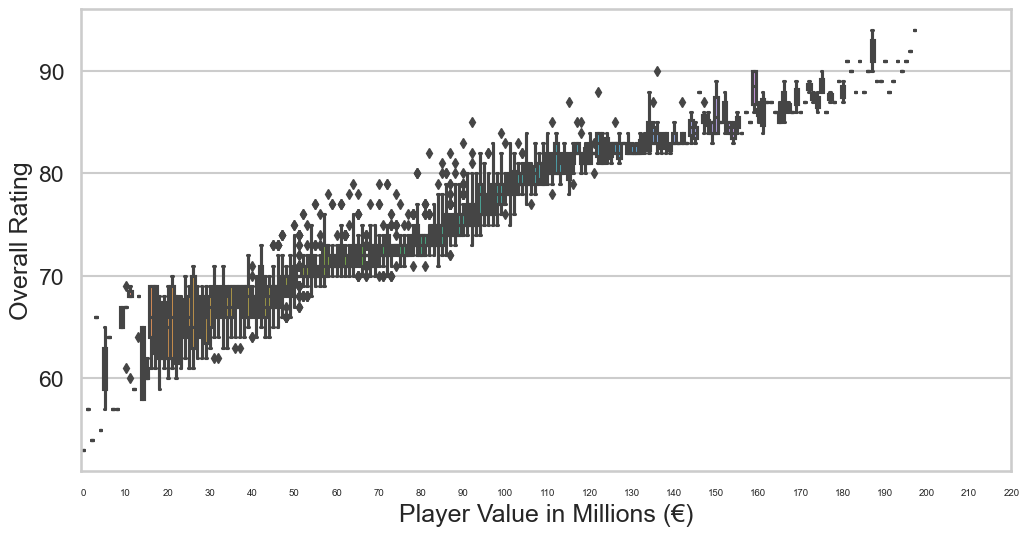

In [330]:
# Boxplot on overall_rating and value_wage of the player 
# Create the boxplot with 'value_euro' values adjusted to millions
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_player_info['value_euro'] / 1000000, y="overall_rating", data=df_player_info)

# Customize the x-axis label with appropriate ticks
ticks = np.arange(0, 230, 10)  
plt.xticks(ticks, labels=ticks, rotation=0, fontsize=7)

# Set the custom axis labels
plt.xlabel("Player Value in Millions (€)")
plt.ylabel("Overall Rating")

plt.savefig('Resources/Value_overall_scatter.png')

# Show the plot
plt.show()

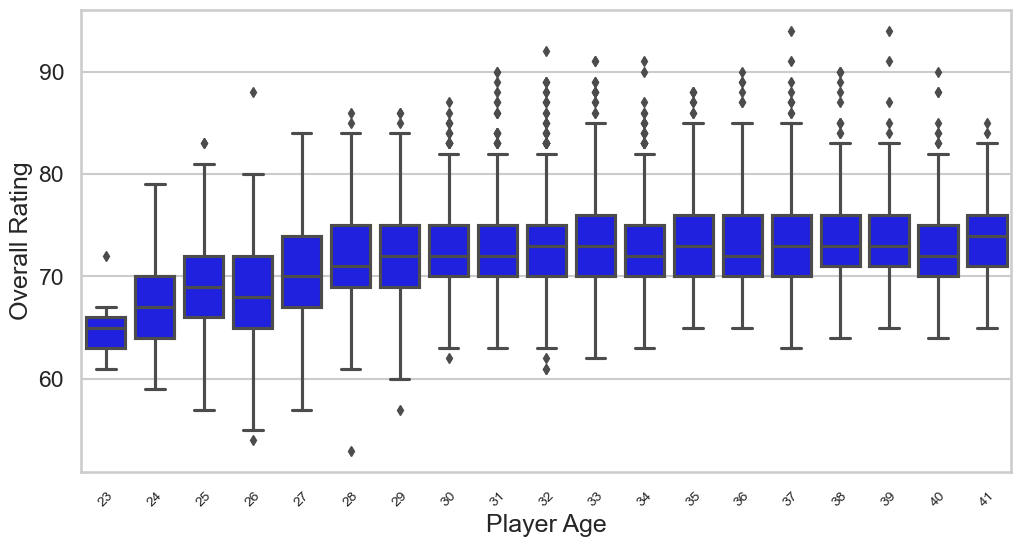

In [331]:
# Boxplot on overall_rating and age of the player 
# Create boxplot 
plt.figure(figsize=(12, 6))
sns.boxplot(x="age", y="overall_rating", data=df_player_info, color="blue")

# customize the x-axis label 
plt.xticks(rotation=45, fontsize = 10)

# Set the custom axis labels
plt.xlabel("Player Age")
plt.ylabel("Overall Rating")

plt.savefig('Resources/age_overall_boxplot.png')

# Show the plot
plt.show()



c:\Users\rdesh\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rdesh\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rdesh\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rdesh\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: Fut

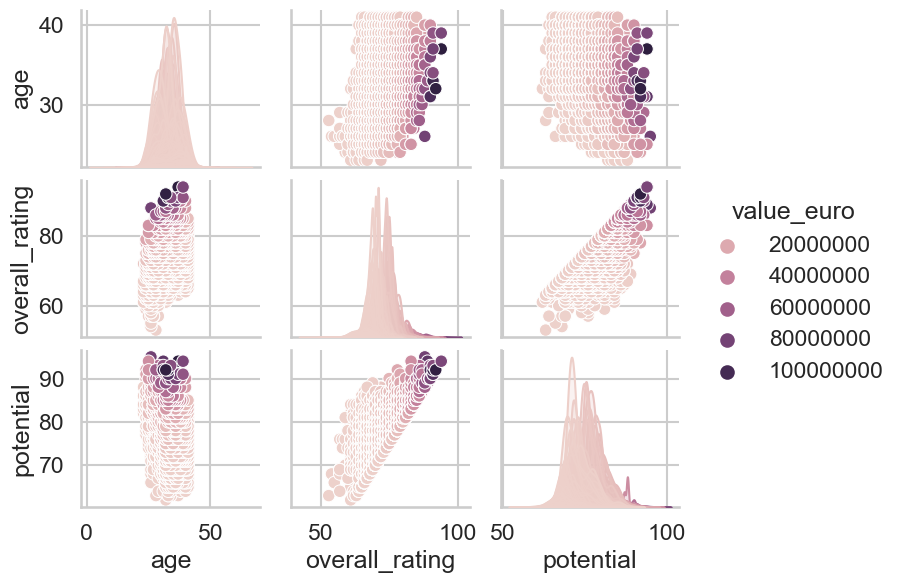

In [332]:
#Filtering Dataframe to have columns needed for pair plot.
column_toplot = df_player_info[['age', 'overall_rating', 'potential','value_euro']]

# Pair plot style
sns.set_style("whitegrid")
sns.set_context("talk")

# plotting pair plot and setting parameters. 
sns.pairplot(data=column_toplot, 
             hue="value_euro",
             kind='scatter',  
             diag_kind='auto',  
             height=2, 
             aspect=1.2,
            )

plt.savefig('Resources/correlation_pairplot.png')

plt.show()

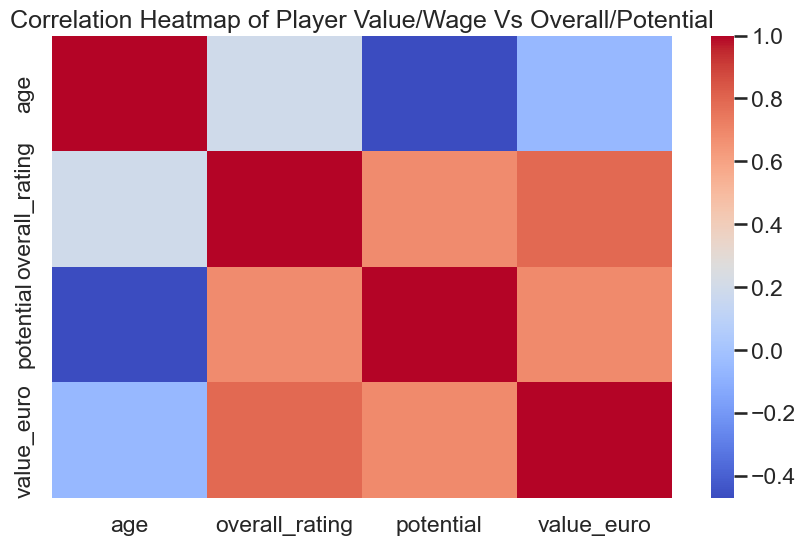

In [333]:
# Assuming column_toplot is your DataFrame containing the relevant columns
# Calculate the correlation matrix
correlation_matrix = column_toplot.corr()
# Set style for heatmap
sns.set_style("whitegrid")
sns.set_context("talk")
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Player Value/Wage Vs Overall/Potential")

plt.savefig('Resources/correlation_heatmap.png')

plt.show()



In [334]:
# Exporting dataframe as CSV files
df_player_info.to_csv('Resources/player_info.csv', index=False)
df_gk.to_csv('Resources/goalkeeper_data.csv', index=False)
df_attackers.to_csv('Resources/attackers_data.csv', index=False)
df_defense.to_csv('Resources/defensive_data.csv', index=False)
df_physical.to_csv('Resources/physical_data.csv', index=False)